# CGP for image noise filters - Analysis of results

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from glob import glob
from matplotlib.pyplot import figure, imshow, axis
from matplotlib.image import imread
from analyze_results import load_results, plot_conv_lines, plot_run_data_boxplot, to_dataframes, mse_with_target
import seaborn as sns


In [3]:
# Following function was taken from https://stackoverflow.com/a/38556650
def show_images(image_paths : list[str]):
    fig = figure()
    number_of_files = len(image_paths)
    for i in range(number_of_files):
        fig.add_subplot(1, number_of_files, i+1)
        image = imread(image_paths[i])
        imshow(image, cmap='gray')
        axis('off')
# End of part taken from https://stackoverflow.com/a/38556650

## Training and testing data
Data were chosen to maximise diversity of textures (and objects) on images. Following images were used for training (as a reference) and testing:

/mnt/c/Users/vojon/Documents/Škola/2_sem_ing/EVO/EVO/env/lib/python3.10/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
/mnt/c/Users/vojon/Documents/Škola/2_sem_ing/EVO/EVO/env/lib/python3.10/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
/mnt/c/Users/vojon/Documents/Škola/2_sem_ing/EVO/EVO/env/lib/python3.10/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


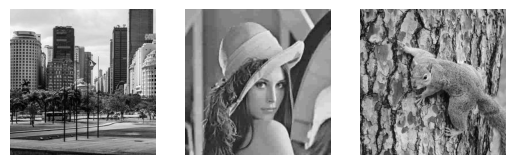

In [4]:
show_images(glob('../data/target256/*'))

As you can see there are three different images - city with narrow lines, lena (as typical testing image) and squirrel withl a lot of curves and various colors.

## CGP parameters
Although there were some experiments focused on influence of specific parameter some parameters of CGP were (mostly) unchanged:

1000 generations

Tournament selection - 2 participants

12 population size

Up to 8 mutated individuals

Primitives (functions of elements in array) - Const255, Const0, Identity, Inversion, Inversion, ConditionalAssignment, Min, Div2, Div4, Add, Sub, AddS, SubS, Avg - functions with arity 0 to 2

30 runs of every tested configuration

## Noise types

Experiments were done with 7 types of noises. Noised images were created by `noise_images.py` and `prepare_data.sh` scripts. Types of noise are:

*gaus* - To some pixels a random value from normal distribution was added (15 % pixels were noised), typical gaussian additive noise

*line-color* - There are horizontal lines with different color (color of each line was generated randomly from normal distribution) (approx. 20 % pixels were affected)

*line* - There are horizontal lines mostly with white color (approx. 20 % pixels were affected)

*line-d* - There are diagonal lines mostly with white color (approx. 20 % ...)

*scratch* - There are small random curves with various colors which creates something like cratches on the image (approx. 25 % pixels were affected)

*scratch_old* - There are small random curves mostly with white color which creates something like cratches on the image (approx. 25 % pixels were affected)

*sp* - Salt and pepper noise (10 %)

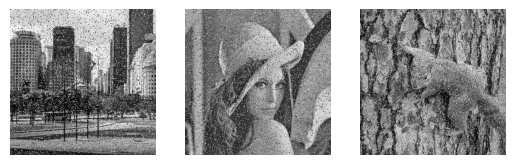

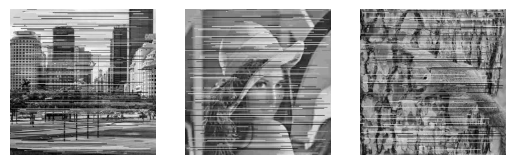

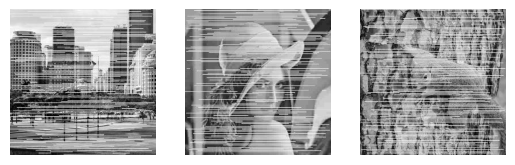

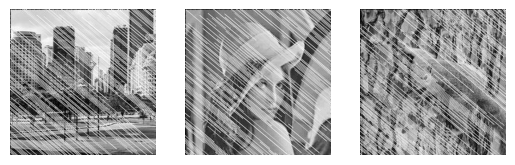

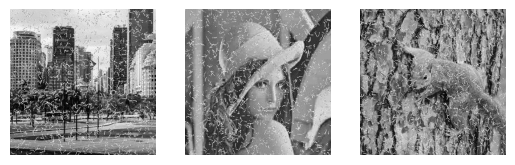

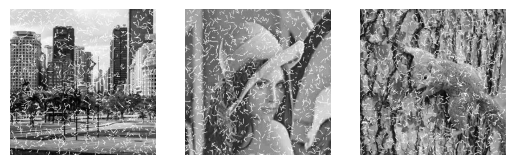

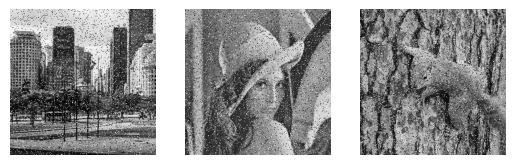

In [5]:
show_images(glob('../data/gaus256/*'))
show_images(glob('../data/line-color256/*'))
show_images(glob('../data/line256/*'))
show_images(glob('../data/lined256/*'))
show_images(glob('../data/scratch256/*'))
show_images(glob('../data/scratch256_old/*'))
show_images(glob('../data/sp256/*'))

## Experiments


### Different noises with initial CGP settings

Initial experiments to try capability to filter each noise type just by initial settings:

Rectangular window 3x3, mutation rate 0.1, l-back 2, rows 9, columns 4

In [6]:
results = load_results(['../results/just-noises/*'])
experiments, runs, generations = to_dataframes(results)

Loading result stored in ../results/just-noises/gaus-03-05-22-09
* Params
* Best filter json description
* Best filter pickled object
* Logs from 30 runs
Loading result stored in ../results/just-noises/line-03-05-22-09
* Params
* Best filter json description
* Best filter pickled object
* Logs from 30 runs
Loading result stored in ../results/just-noises/linecolor-04-05-18-54
* Params
* Best filter json description
* Best filter pickled object
* Logs from 30 runs
Loading result stored in ../results/just-noises/lined-03-05-22-09
* Params
* Best filter json description
* Best filter pickled object
* Logs from 30 runs
Loading result stored in ../results/just-noises/scratch-04-05-18-54
* Params
* Best filter json description
* Best filter pickled object
* Logs from 30 runs
Loading result stored in ../results/just-noises/scratch-old-04-05-18-54
* Params
* Best filter json description
* Best filter pickled object
* Logs from 30 runs
Loading result stored in ../results/just-noises/sp-04-05-18-

Initial values of fitnesses for each noise:

In [7]:
lena_init_fitness = mse_with_target('../data/target256/lena.jpg', ['../data/*256/lena.jpg', '../data/*256_old/lena.jpg'])
lena_init_fitness['noise_name'] = ['gaus', 'linecolor', 'line', 'lined', 'scratch', 'sp', None, 'scratch-old']
lena_init_fitness = lena_init_fitness.dropna()
lena_init_fitness

,image,mse,noise_name
0,../data/gaus256/lena.jpg,1166.889252,gaus
1,../data/line-color256/lena.jpg,1895.141830,linecolor
2,../data/line256/lena.jpg,2986.026779,line
3,../data/lined256/lena.jpg,2632.041046,lined
4,../data/scratch256/lena.jpg,984.083939,scratch
5,../data/sp256/lena.jpg,1842.707794,sp
7,../data/scratch256_old/lena.jpg,1824.777954,scratch-old


/tmp/ipykernel_6130/125583411.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(['Gauss', 'S&P', 'Linky', 'Linky\ns náh. barvou', 'Diag. linky', 'Scratch', 'Scratch\ns n. b.'])


Text(0.05, 0.5, 'Fitness')

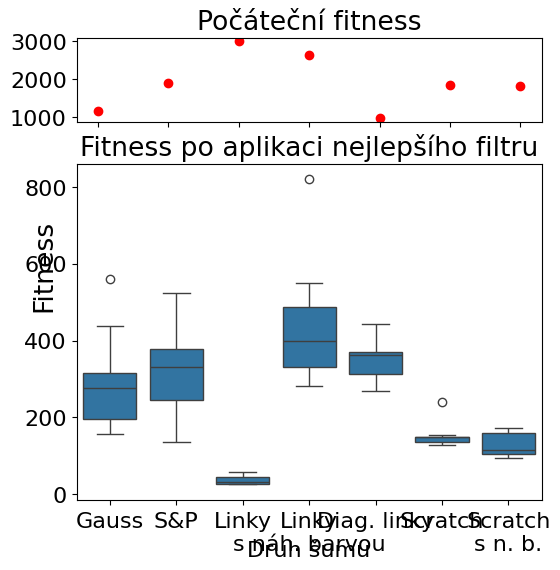

In [8]:
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(2, 1, figsize=(6,6), gridspec_kw={'height_ratios': [1, 4]})

first = True
for n, f in zip(lena_init_fitness['noise_name'], lena_init_fitness['mse']):
    ax[0].plot(n, f, 'ro', label='Počáteční fitness' if first else '')
    first = False

ax[0].set_title('Počáteční fitness')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].set_xticklabels([])

#fig, ax = plt.subplots(figsize=(14,10))
ax[1] = plot_run_data_boxplot(experiments, runs, data_name='fitness', ax=ax[1], plot_params={
    'order' : ['gaus', 'sp', 'line', 'linecolor', 'lined', 'scratch', 'scratch-old'],
})
ax[1].set_title('Fitness po aplikaci nejlepšího filtru')
ax[1].set_ylabel('')
ax[1].set_xlabel('Druh šumu')
ax[1].xaxis.set_label_coords(0.5, -0.12)
ax[1].set_xticklabels(['Gauss', 'S&P', 'Linky', 'Linky\ns náh. barvou', 'Diag. linky', 'Scratch', 'Scratch\ns n. b.'])
ax[1].tick_params(axis='x', labelrotation=0, pad=5)

# fig.suptitle('Hodnota fitness pro různé druhy šumu')
fig.supylabel('Fitness', x=0.05)
#ax.set_yscale('log')



<Axes: xlabel='Generation', ylabel='Fitness'>

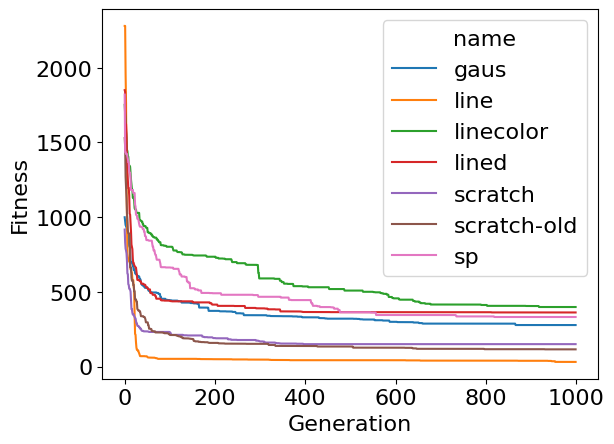

In [9]:
plot_conv_lines(experiments, generations, plot_params={ 'estimator' : 'median',  'errorbar' : None})

### Different mutation rates

Experiment was focused to try different mutation rates for some of noise types:

gaus, lined, scratch, sp were tried with mutation rates 0.02, 0.1, 1.5

In [10]:
results_mut = load_results(['../results/mut/*'])
experiments_mut, runs_mut, generations_mut = to_dataframes(results_mut)

experiments_mut['noise'] = [ r['params']['name'].split('-')[0] for r in results_mut]
experiments_mut['mut'] = [ r['params']['algorithm_params']['mutation_rate'] for r in results_mut]


m=experiments_mut['mut'].isin([0.05])
df = experiments_mut[~m].dropna()

experiments_mut

Loading result stored in ../results/mut/gaus-mut02-03-05-03-10
* Params
* Best filter json description
* Best filter pickled object
* Logs from 30 runs
Loading result stored in ../results/mut/gaus-mut1-03-05-03-10
* Params
* Best filter json description
* Best filter pickled object
* Logs from 30 runs
Loading result stored in ../results/mut/gaus-mut15-03-05-03-10
* Params
* Best filter json description
* Best filter pickled object
* Logs from 30 runs
Loading result stored in ../results/mut/lined-mut02-03-05-03-10
* Params
* Best filter json description
* Best filter pickled object
* Logs from 30 runs
Loading result stored in ../results/mut/lined-mut1-03-05-03-10
* Params
* Best filter json description
* Best filter pickled object
* Logs from 30 runs
Loading result stored in ../results/mut/lined-mut15-03-05-03-10
* Params
* Best filter json description
* Best filter pickled object
* Logs from 30 runs
Loading result stored in ../results/mut/scratch-mut02-03-05-03-10
* Params
* Best filte

,i,name,path,best-fitness,run-count,noise,mut
0,0,gaus-mut02,../results/mut/gaus-mut02-03-05-03-10,-463.302795,30,gaus,0.02
1,1,gaus-mut1,../results/mut/gaus-mut1-03-05-03-10,-428.088242,30,gaus,0.10
2,2,gaus-mut15,../results/mut/gaus-mut15-03-05-03-10,-497.924759,30,gaus,0.15
3,3,lined-mut02,../results/mut/lined-mut02-03-05-03-10,-227.319977,30,lined,0.02
4,4,lined-mut1,../results/mut/lined-mut1-03-05-03-10,-222.455032,30,lined,0.10
5,5,lined-mut15,../results/mut/lined-mut15-03-05-03-10,-222.507904,30,lined,0.15
6,6,scratch-mut02,../results/mut/scratch-mut02-03-05-03-10,-115.585632,30,scratch,0.02
7,7,scratch-mut05,../results/mut/scratch-mut05-03-05-03-10,-114.267334,30,scratch,0.05
8,8,scratch-mut1,../results/mut/scratch-mut1-03-05-03-22,-120.942795,30,scratch,0.10
9,9,scratch-mut15,../results/mut/scratch-mut15-03-05-03-10,-119.012466,30,scratch,0.15


/tmp/ipykernel_6130/884208143.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_m.set_xticklabels(['Gauss', 'S&P', 'Diag. linky', 'Scratch'])


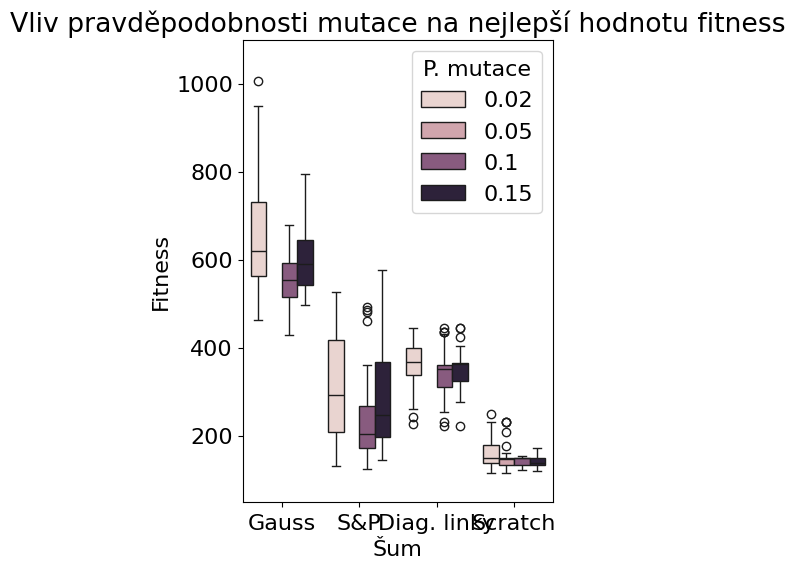

In [11]:

fig_m, ax_m = plt.subplots(1, 1, figsize=(8,6))

ax_m = plot_run_data_boxplot(experiments_mut, runs_mut, data_name='fitness', x='noise', ax=ax_m, plot_params={
    'hue' : 'mut',
    'order' : ['gaus', 'sp', 'lined', 'scratch']
})

ax_m.set_title('Vliv pravděpodobnosti mutace na nejlepší hodnotu fitness')
ax_m.set_ylabel('Fitness')
ax_m.set_xlabel('Šum')
ax_m.set_ylim(50, 1100)
ax_m.set_xticklabels(['Gauss', 'S&P', 'Diag. linky', 'Scratch'])
ax_m.tick_params(axis='x', labelrotation=0, pad=5)
ax_m.legend(title='P. mutace')


### Statistics tests

In [12]:
runs_mut

,duration,fitness,experiment-i,experiment-name
0,1793.4510,731.552063,0,gaus-mut02
1,1455.9619,691.605072,0,gaus-mut02
2,1530.9617,578.060989,0,gaus-mut02
3,1447.7977,1005.146606,0,gaus-mut02
4,1472.7739,558.535782,0,gaus-mut02
...,...,...,...,...
25,3832.4303,287.211960,12,sp-mut15
26,2826.1216,298.614685,12,sp-mut15
27,3477.2196,183.542465,12,sp-mut15
28,3035.4311,367.515289,12,sp-mut15


In [13]:
gaus_mut15 = runs_mut.loc[runs_mut['experiment-name'] == 'gaus-mut15']
gaus_mut1 = runs_mut.loc[runs_mut['experiment-name'] == 'gaus-mut1']
gaus_mut02 = runs_mut.loc[runs_mut['experiment-name'] == 'gaus-mut02']
gaus_mut15

,duration,fitness,experiment-i,experiment-name
0,2705.4171,587.447998,2,gaus-mut15
1,2135.6656,793.522400,2,gaus-mut15
2,3292.6118,596.099670,2,gaus-mut15
3,3514.9565,605.148773,2,gaus-mut15
4,2198.8780,542.144775,2,gaus-mut15
5,2568.7775,523.667923,2,gaus-mut15
6,2694.1022,593.585464,2,gaus-mut15
7,3580.5618,592.202423,2,gaus-mut15
8,2703.4538,731.836319,2,gaus-mut15
9,2371.7578,565.657608,2,gaus-mut15


In [14]:
t, p = st.normaltest(gaus_mut1['fitness'])
print(p)

t, p = st.normaltest(gaus_mut15['fitness'])
print(p) 

t, p = st.normaltest(gaus_mut02['fitness'])
print(p) 

0.9533764207948549
0.07051611224827889
0.003869356585182644


gaus_mut02 Doesn seem to be from normal distribution -> we must choose U-test

In [15]:
fintesses = pd.concat([gaus_mut1['fitness'], gaus_mut15['fitness']])
any(fintesses.duplicated())

True

In [16]:
fintesses = pd.concat([gaus_mut1['fitness'], gaus_mut02['fitness']])
any(fintesses.duplicated())

True

!We cannot use U-test, there are duplicates... anyway:

In [17]:
t, p = st.mannwhitneyu(gaus_mut1['fitness'], gaus_mut15['fitness'])
print(p)

0.018366338435180207


In [18]:
t, p = st.mannwhitneyu(gaus_mut1['fitness'], gaus_mut02['fitness'])
print(p)

0.0002253448918350562


In [19]:
sp_mut15 = runs_mut.loc[runs_mut['experiment-name'] == 'sp-mut15']
sp_mut1 = runs_mut.loc[runs_mut['experiment-name'] == 'sp-mut1']
sp_mut02 = runs_mut.loc[runs_mut['experiment-name'] == 'sp-mut02']
sp_mut15

,duration,fitness,experiment-i,experiment-name
0,2341.8025,491.527359,12,sp-mut15
1,3846.3914,318.845200,12,sp-mut15
2,3115.3748,367.990051,12,sp-mut15
3,2060.8775,427.439728,12,sp-mut15
4,3455.2356,178.599640,12,sp-mut15
5,3009.0143,183.341812,12,sp-mut15
6,2694.3597,194.958740,12,sp-mut15
7,2664.0594,208.276138,12,sp-mut15
8,2975.2031,196.168961,12,sp-mut15
9,2428.3339,200.747177,12,sp-mut15


In [20]:
t, p = st.normaltest(sp_mut1['fitness'])
print(p)

t, p = st.normaltest(sp_mut15['fitness'])
print(p) 

t, p = st.normaltest(sp_mut02['fitness'])
print(p) 

0.008291841171025261
0.1354829695296343
0.030952524567048775


Again sp_mut1 doesn't seem to be from normal distribution...

In [21]:
fintesses = pd.concat([sp_mut1['fitness'], sp_mut15['fitness']])
any(fintesses.duplicated())

True

In [22]:
fintesses = pd.concat([sp_mut1['fitness'], sp_mut02['fitness']])
any(fintesses.duplicated())

False

In [23]:
t, p = st.mannwhitneyu(sp_mut1['fitness'], sp_mut02['fitness'])
print(p)

0.012732114616306573


In [24]:
t, p = st.mannwhitneyu(sp_mut1['fitness'], sp_mut15['fitness'])
print(p)

0.05460550526992425


Text(0.5, 0, 'Generace')

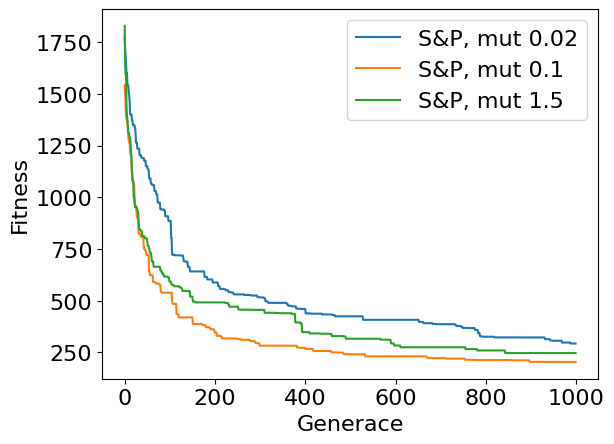

In [25]:
ax = plot_conv_lines(experiments_mut, generations_mut, filter_regex=r'sp', plot_params={ 'estimator' : 'median',  'errorbar' : None})
ax.legend(title='', labels=['S&P, mut 0.02', 'S&P, mut 0.1', 'S&P, mut 1.5'])
ax.set_xlabel('Generace')

Text(0.5, 0, 'Generace')

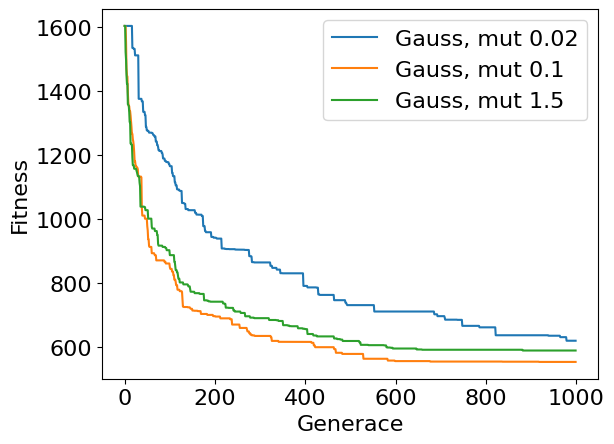

In [26]:
ax = plot_conv_lines(experiments_mut, generations_mut, filter_regex=r'gaus', plot_params={ 'estimator' : 'median',  'errorbar' : None})
ax.legend(title='', labels=['Gauss, mut 0.02', 'Gauss, mut 0.1', 'Gauss, mut 1.5'])
ax.set_xlabel('Generace')

### Different matrix size

gaus, lined, scratch, sp were tried with matrix sizes 2x10, 5x5, 9x6

In [27]:
results_size = load_results(['../results/size/*'])
experiments_size, runs_size, generations_size = to_dataframes(results_size)

experiments_size['noise'] = [ r['params']['name'].split('_')[0] for r in results_size]
experiments_size['size'] = [ r['params']['name'].split('_')[1] for r in results_size]

experiments_size

Loading result stored in ../results/size/gaus_2x10-03-05-03-22
* Params
* Best filter json description
* Best filter pickled object
* Logs from 30 runs
Loading result stored in ../results/size/gaus_5x5-03-05-03-22
* Params
* Best filter json description
* Best filter pickled object
* Logs from 30 runs
Loading result stored in ../results/size/gaus_9x6-03-05-03-22
* Params
* Best filter json description
* Best filter pickled object
* Logs from 30 runs
Loading result stored in ../results/size/lined_2x10-03-05-03-22
* Params
* Best filter json description
* Best filter pickled object
* Logs from 30 runs
Loading result stored in ../results/size/lined_5x5-03-05-03-22
* Params
* Best filter json description
* Best filter pickled object
* Logs from 30 runs
Loading result stored in ../results/size/lined_9x6-03-05-03-22
* Params
* Best filter json description
* Best filter pickled object
* Logs from 30 runs
Loading result stored in ../results/size/scratch_2x10-03-05-03-22
* Params
* Best filter 

,i,name,path,best-fitness,run-count,noise,size
0,0,gaus_2x10,../results/size/gaus_2x10-03-05-03-22,-452.803177,30,gaus,2x10
1,1,gaus_5x5,../results/size/gaus_5x5-03-05-03-22,-432.514023,30,gaus,5x5
2,2,gaus_9x6,../results/size/gaus_9x6-03-05-03-22,-453.662643,30,gaus,9x6
3,3,lined_2x10,../results/size/lined_2x10-03-05-03-22,-222.452255,30,lined,2x10
4,4,lined_5x5,../results/size/lined_5x5-03-05-03-22,-262.406891,30,lined,5x5
5,5,lined_9x6,../results/size/lined_9x6-03-05-03-22,-218.270905,30,lined,9x6
6,6,scratch_2x10,../results/size/scratch_2x10-03-05-03-22,-121.095123,30,scratch,2x10
7,7,scratch_5x5,../results/size/scratch_5x5-03-05-03-22,-122.835724,30,scratch,5x5
8,8,scratch_9x6,../results/size/scratch_9x6-03-05-03-22,-120.942795,30,scratch,9x6
9,9,sp_2x10,../results/size/sp_2x10-03-05-03-22,-155.424789,30,sp,2x10


/tmp/ipykernel_6130/3406646051.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_s.set_xticklabels(['Gauss', 'S&P', 'Diag. linky', 'Scratch'])


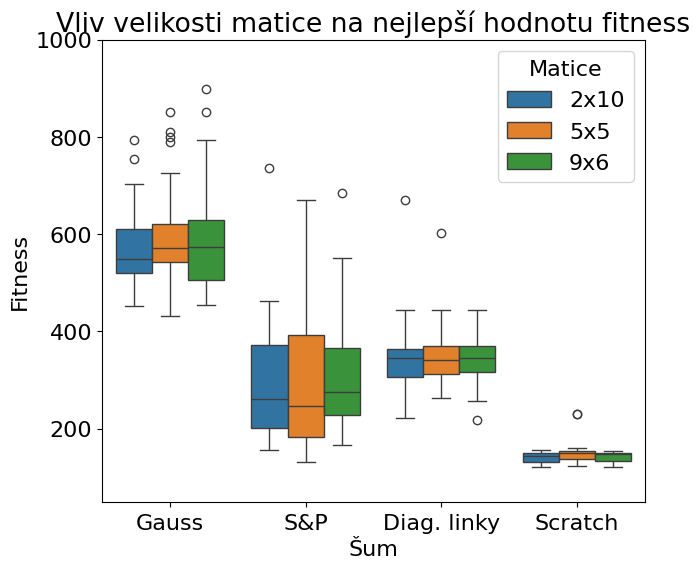

In [28]:
fig_s, ax_s = plt.subplots(1, 1, figsize=(7,6))

ax_s = plot_run_data_boxplot(experiments_size, runs_size, data_name='fitness', x='noise', ax=ax_s, plot_params={
    'hue' : 'size',
    'order' : ['gaus', 'sp', 'lined', 'scratch']
})

ax_s.set_title('Vliv velikosti matice na nejlepší hodnotu fitness')
ax_s.set_ylabel('Fitness')
ax_s.set_xlabel('Šum')
ax_s.set_ylim(50, 1000)
ax_s.set_xticklabels(['Gauss', 'S&P', 'Diag. linky', 'Scratch'])
ax_s.tick_params(axis='x', labelrotation=0, pad=5)
ax_s.legend(title='Matice')


In [33]:
gaus_2x10 = runs_size.loc[runs_size['experiment-name'] == 'gaus_2x10']
gaus_5x5 = runs_size.loc[runs_size['experiment-name'] == 'gaus_5x5']
gaus_9x6 = runs_size.loc[runs_size['experiment-name'] == 'gaus_9x6']
gaus_2x10

,duration,fitness,experiment-i,experiment-name
0,2725.2051,452.803177,0,gaus_2x10
1,2199.5731,632.896744,0,gaus_2x10
2,3482.8529,530.271942,0,gaus_2x10
3,2972.8454,481.301636,0,gaus_2x10
4,3435.0777,570.706985,0,gaus_2x10
5,3193.3725,703.586472,0,gaus_2x10
6,2976.3635,468.032654,0,gaus_2x10
7,2191.5812,581.624985,0,gaus_2x10
8,3301.3175,547.070526,0,gaus_2x10
9,2117.0529,502.770721,0,gaus_2x10


In [34]:
t, p = st.normaltest(gaus_2x10['fitness'])
print(p)

t, p = st.normaltest(gaus_5x5['fitness'])
print(p) 

t, p = st.normaltest(gaus_9x6['fitness'])
print(p) 

0.024691224222484088
0.059010673605940964
0.01348510520180088


In [35]:
fintesses = pd.concat([gaus_2x10['fitness'], gaus_5x5['fitness']])
any(fintesses.duplicated())

False

In [36]:
fintesses = pd.concat([gaus_2x10['fitness'], gaus_9x6['fitness']])
any(fintesses.duplicated())

False

In [37]:
t, p = st.mannwhitneyu(gaus_2x10['fitness'], gaus_5x5['fitness'])
print(p)

0.20620548705301323


In [38]:
t, p = st.mannwhitneyu(gaus_2x10['fitness'], gaus_9x6['fitness'])
print(p)

0.5201446121616038


### Window shape



In [29]:
results_w = load_results([
    '../results/window/*',
    '../results/just-noises/gaus*',
    '../results/just-noises/line*',
    '../results/just-noises/lined*',
    '../results/just-noises/sp*'
])
experiments_w, runs_w, generations_w = to_dataframes(results_w)

experiments_w['noise'] = [ r['params']['name'].split('-')[0] for r in results_w]
experiments_w['window'] = [ r['params']['name'].split('-')[2] if len(r['params']['name'].split('-')) > 1 else '3x3' for r in results_w]

experiments_w

Loading result stored in ../results/window/gaus-window-3d-03-05-10-22
* Params
* Best filter json description
* Best filter pickled object
* Logs from 30 runs
Loading result stored in ../results/window/gaus-window-3x1-03-05-10-22
* Params
* Best filter json description
* Best filter pickled object
* Logs from 30 runs
Loading result stored in ../results/window/gaus-window-5x5-03-05-22-05
* Params
* Best filter json description
* Best filter pickled object
* Logs from 30 runs
Loading result stored in ../results/window/gaus-window-cross-03-05-10-22
* Params
* Best filter json description
* Best filter pickled object
* Logs from 30 runs
Loading result stored in ../results/window/line-window-3d-03-05-10-22
* Params
* Best filter json description
* Best filter pickled object
* Logs from 30 runs
Loading result stored in ../results/window/line-window-3x1-03-05-10-22
* Params
* Best filter json description
* Best filter pickled object
* Logs from 30 runs
Loading result stored in ../results/wind

,i,name,path,best-fitness,run-count,noise,window
0,0,gaus-window-3d,../results/window/gaus-window-3d-03-05-10-22,-834.515091,30,gaus,3d
1,1,gaus-window-3x1,../results/window/gaus-window-3x1-03-05-10-22,-463.998779,30,gaus,3x1
2,2,gaus-window-5x5,../results/window/gaus-window-5x5-03-05-22-05,-434.540451,30,gaus,5x5
3,3,gaus-window-cross,../results/window/gaus-window-cross-03-05-10-22,-439.363129,30,gaus,cross
4,4,line-window-3d,../results/window/line-window-3d-03-05-10-22,-313.524994,30,line,3d
5,5,line-window-3x1,../results/window/line-window-3x1-03-05-10-22,-3086.941772,30,line,3x1
6,6,line-window-5x5,../results/window/line-window-5x5-03-05-22-05,-182.165695,30,line,5x5
7,7,line-window-cross,../results/window/line-window-cross-03-05-10-22,-179.101913,30,line,cross
8,8,lined-window-3d,../results/window/lined-window-3d-03-05-22-37,-2482.659164,30,lined,3d
9,9,lined-window-3x1,../results/window/lined-window-3x1-03-05-22-37,-3835.209702,30,lined,3x1


/tmp/ipykernel_6130/613665971.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_w[i].set_xticklabels([labels[i]])
/tmp/ipykernel_6130/613665971.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_w[i].set_xticklabels([labels[i]])
/tmp/ipykernel_6130/613665971.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_w[i].set_xticklabels([labels[i]])
/tmp/ipykernel_6130/613665971.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_w[i].set_xticklabels([labels[i]])


Text(0.5, -0.02, 'Šum')

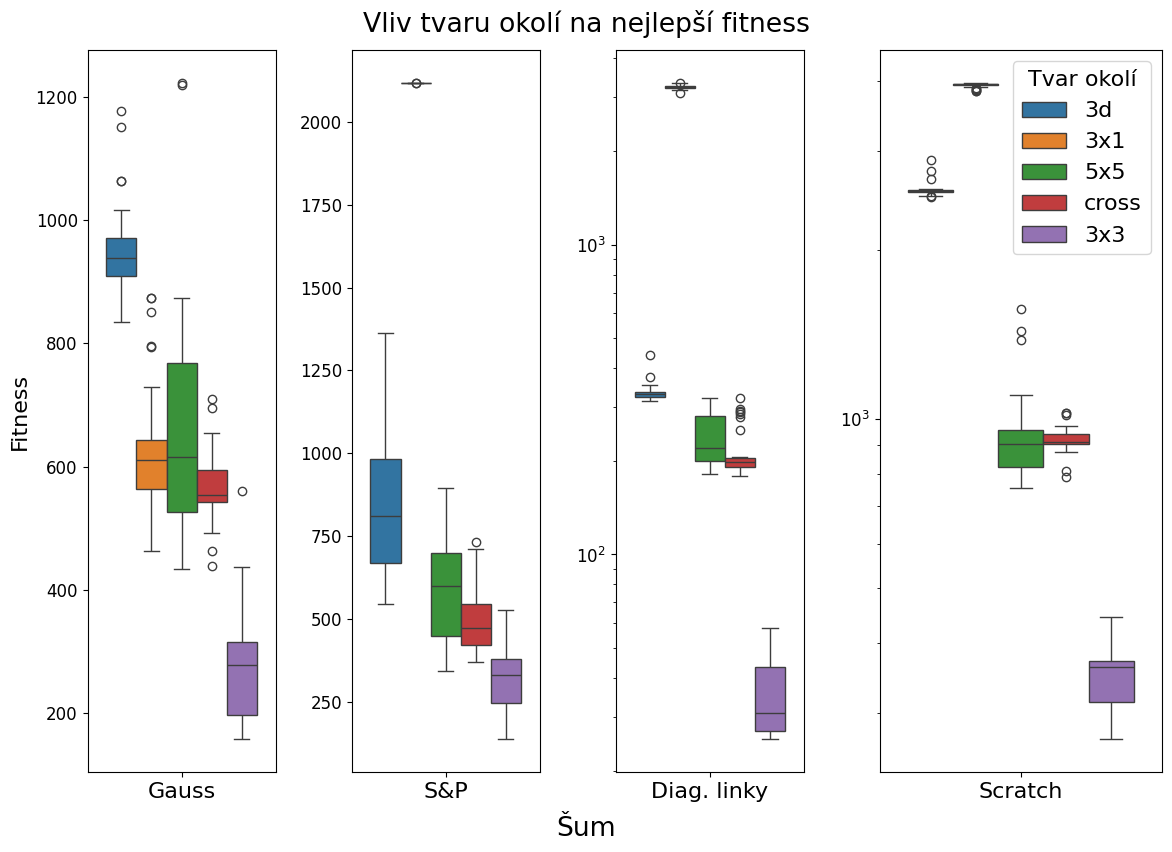

In [30]:
fig_w, ax_w = plt.subplots(1, 4, figsize=(12,8), gridspec_kw={'width_ratios': [2, 2, 2, 3]})

first = True
noises = ['gaus', 'sp', 'line', 'lined']
labels = ['Gauss', 'S&P', 'Diag. linky', 'Scratch']
scales = ['linear', 'linear', 'log', 'log']
for i in range(len(noises)):
    subset_w = experiments_w.loc[experiments_w['noise'] == noises[i]]
    plot_run_data_boxplot(subset_w, runs_w, data_name='fitness', x='noise', ax=ax_w[i], plot_params={
        'hue' : 'window'
    })

    ax_w[i].set_xticklabels([labels[i]])

    if first:
        ax_w[i].set_ylabel('Fitness')
        ax_w[i].get_legend().remove()
        first = False
    elif i == len(noises) - 1:
        ax_w[i].set_ylabel('')
        ax_w[i].legend(title='Tvar okolí')
    else:
        ax_w[i].set_ylabel('')
        ax_w[i].get_legend().remove()
    
    ax_w[i].set_yscale(scales[i])
    ax_w[i].set_xlabel('')
    ax_w[i].tick_params(axis='x', labelrotation=0)
    ax_w[i].tick_params(axis='y', which='major', labelsize=12)

fig_w.tight_layout()
fig_w.suptitle('Vliv tvaru okolí na nejlepší fitness', y=1.02)
fig_w.supxlabel('Šum', y=-0.02)

#     ax_w[i].set_title('Vliv tvaru okna na nejlepší hodnotu fitness')
#     ax_w[i].set_ylabel('Fitness')
#     ax_w[i].set_xlabel('Šum')
#     ax_w[i].set_yscale('log')
#     ax_w[i].set_xticklabels(['Gauss', 'S&P', 'Linky', 'Diag. linky'])
#     ax_w[i].tick_params(axis='x', labelrotation=0, pad=5)

# ax_w[i].legend(title='Tvar okna')

Text(0.5, 0, 'Generace')

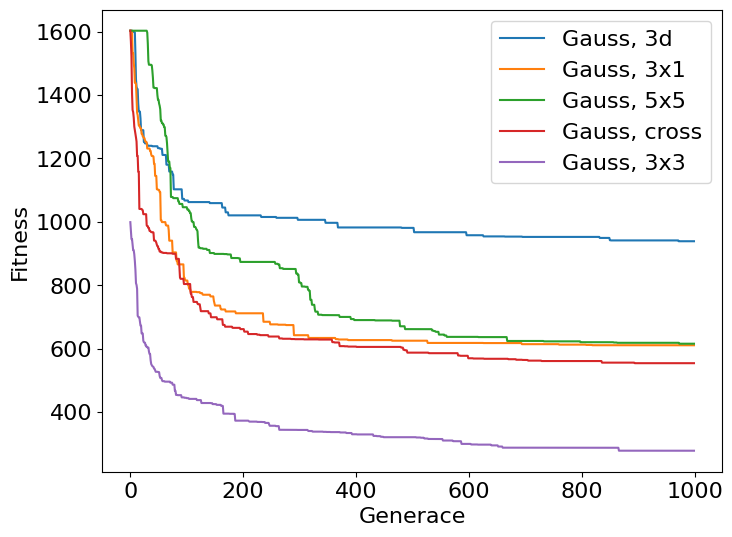

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))
ax = plot_conv_lines(experiments_w, generations_w, filter_regex=r'gaus', ax=ax, plot_params={ 'estimator' : 'median',  'errorbar' : None})
ax.legend(title='', labels=['Gauss, 3d', 'Gauss, 3x1', 'Gauss, 5x5', 'Gauss, cross', 'Gauss, 3x3'])
ax.set_xlabel('Generace')

### Universal-filter

In [39]:
results_u = load_results(['../results/universal-filter/*'])
experiments_u, runs_u, generations_u = to_dataframes(results_u)


Loading result stored in ../results/universal-filter/universal-window-3x3-04-05-18-50
* Params
* Best filter json description
* Best filter pickled object
* Logs from 30 runs


/tmp/ipykernel_6130/3062940684.py:6: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  leg.legendHandles[2].set_color('b')
/tmp/ipykernel_6130/3062940684.py:7: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  leg.legendHandles[2].set_alpha(1)


Text(0.5, 1.0, 'Konvergenční křivka CGP univerzálního filtru')

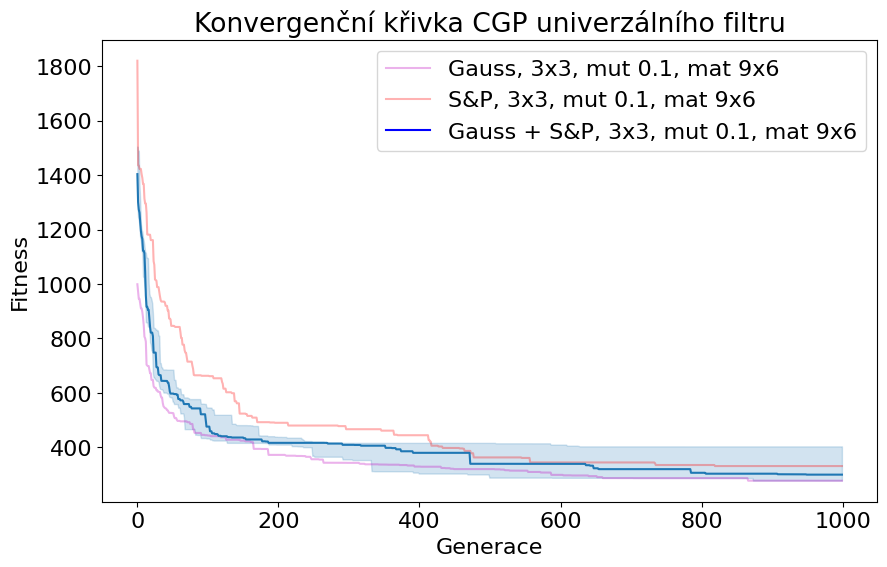

In [85]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax = plot_conv_lines(experiments, generations, filter_regex=r'gaus|sp', ax=ax, plot_params={ 'estimator' : 'median',  'errorbar' : None, 'palette' : ['m', 'r'], 'alpha' : 0.3})
ax = plot_conv_lines(experiments_u, generations_u, ax=ax, plot_params={ 'estimator' : 'median',  'errorbar' : ("pi", 25)})
ax.legend(title='', labels=['Gauss, 3x3, mut 0.1, mat 9x6', 'S&P, 3x3, mut 0.1, mat 9x6', 'Gauss + S&P, 3x3, mut 0.1, mat 9x6'])
leg = ax.get_legend()
leg.legendHandles[2].set_color('b')
leg.legendHandles[2].set_alpha(1)
ax.set_xlabel('Generace')
ax.set_title('Konvergenční křivka CGP univerzálního filtru')

/tmp/ipykernel_6130/462548416.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Gauss', 'S&P', 'Gauss + S&P'])


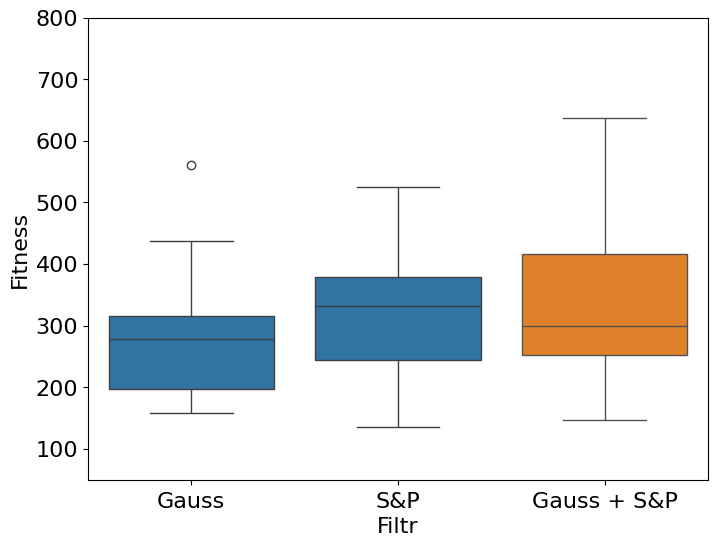

In [93]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))
ax = plot_run_data_boxplot(experiments, runs, data_name='fitness', filter_regex=r'gaus|sp', ax=ax)
ax = plot_run_data_boxplot(experiments_u, runs_u,  data_name='fitness', ax=ax)

ax.set_ylabel('Fitness')
ax.set_xlabel('Filtr')
ax.set_ylim(50, 800)
ax.set_xticklabels(['Gauss', 'S&P', 'Gauss + S&P'])
ax.tick_params(axis='x', labelrotation=0, pad=5)